In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


from config import STRAINS

In [ ]:
# Example:
X = np.load('./X_reference.npy')  
y = np.load('./y_reference.npy')  
print(X.shape())
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)


Accuracy: 0.65
                   precision    recall  f1-score   support

      C. albicans       0.95      0.98      0.96       613
      C. glabrata       1.00      0.99      0.99       611
     K. aerogenes       0.40      0.54      0.46       600
        E. coli 1       0.46      0.44      0.45       636
        E. coli 2       0.40      0.34      0.37       605
       E. faecium       0.74      0.93      0.82       586
    E. faecalis 1       0.41      0.41      0.41       609
    E. faecalis 2       0.39      0.40      0.40       574
       E. cloacae       0.26      0.26      0.26       584
  K. pneumoniae 1       0.56      0.72      0.63       596
  K. pneumoniae 2       0.53      0.50      0.52       593
     P. mirabilis       0.44      0.69      0.54       578
  P. aeruginosa 1       0.77      0.81      0.79       583
  P. aeruginosa 2       0.94      0.94      0.94       585
           MSSA 1       0.56      0.65      0.60       591
           MSSA 3       0.77      0.79  

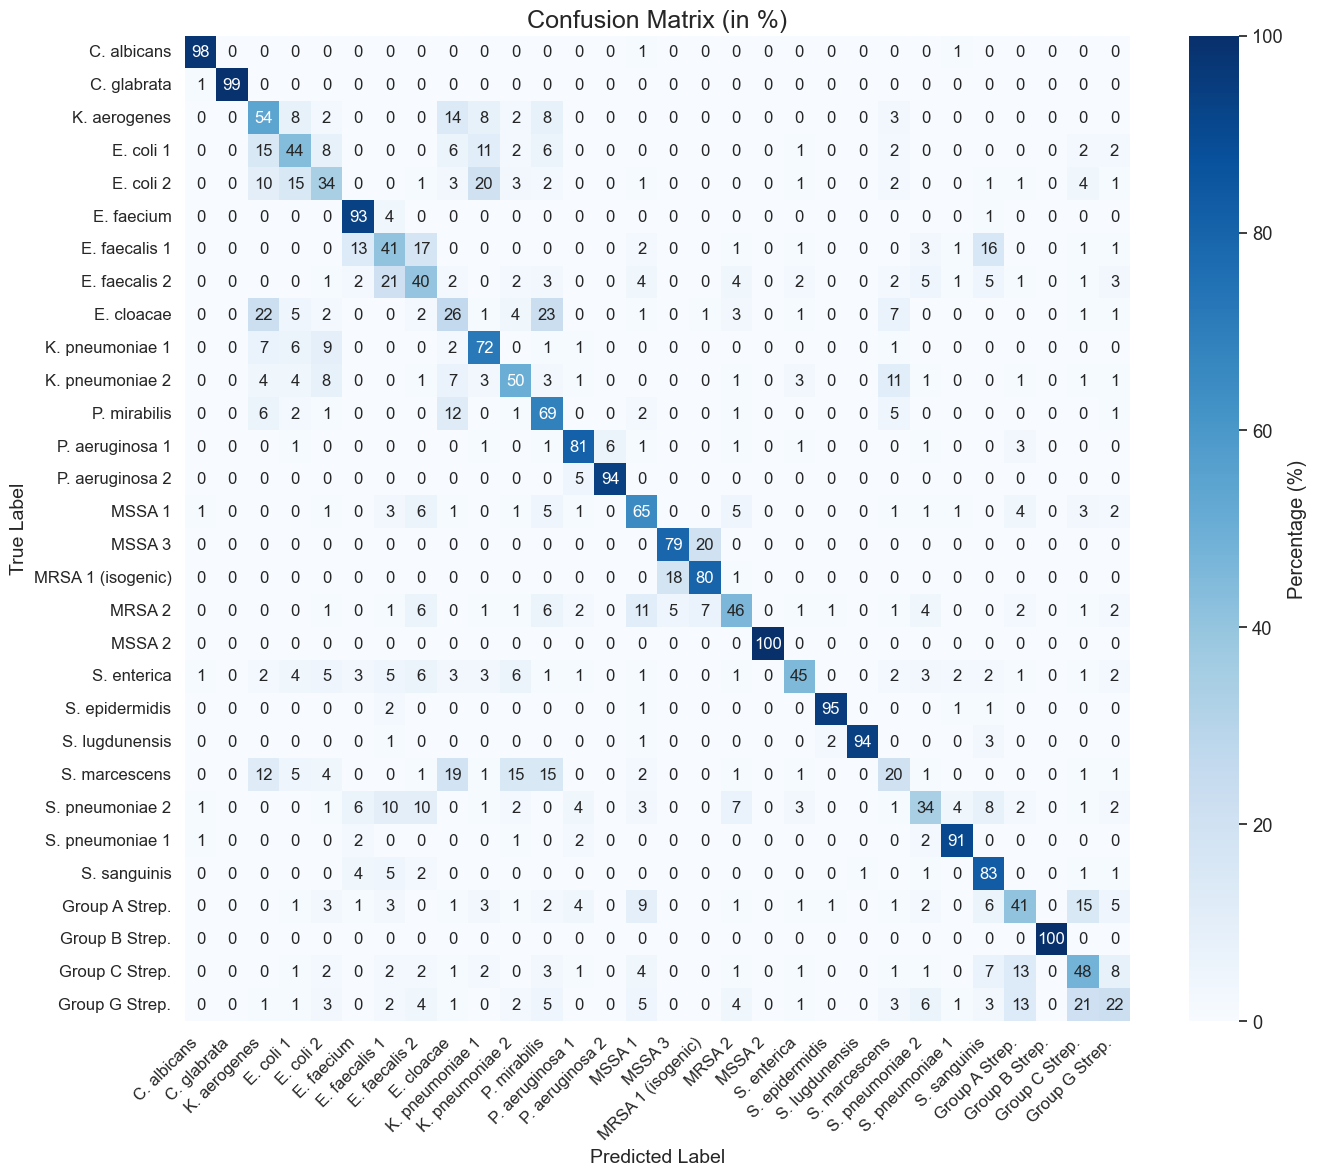

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred, target_names=[STRAINS[i] for i in range(len(STRAINS))]))

# Convert the confusion matrix to percentages
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Round the percentages to whole numbers for display
conf_matrix_percent = np.round(conf_matrix_percent, 0).astype(int)

# Get the strain names in the correct order
labels = [STRAINS[i] for i in range(len(STRAINS))]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(conf_matrix_percent, annot=True, fmt="d", cmap="Blues", 
                      xticklabels=labels, yticklabels=labels, 
                      annot_kws={"size": 12}, cbar_kws={'label': 'Percentage (%)'})

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix (in %)', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
